In [140]:
import pandas as pd
import numpy as np


In [141]:
pip install optuna

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [142]:
import numpy as np
import pandas as pd
import ast
# import pycountry_convert as pc
# import pycountry
# from dataprep.eda import *

#from xgboost import XGBRegressor, XGBClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.linear_model import Ridge ,LinearRegression, LogisticRegression
import optuna
from optuna.samplers import TPESampler

from sklearn.model_selection import KFold,StratifiedKFold ,GroupKFold, cross_val_score, train_test_split, TimeSeriesSplit

from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

from sklearn.cluster import KMeans

#pd.set_option('max_column', 10000)
#pd.set_option('max_row', 10000)

# Plot Packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [143]:
df_test = pd.read_csv("C:\\Users\\akint\\Downloads\\Datafest\\test.csv")
df_test.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
0,3560428,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9
1,6934997,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7
2,5682812,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8
3,6493191,32,semi-monthly,0,5260,3,0,3,1,4,1,1150,64050,0.652429,0.802433,0.593816,0.560389,0.569459,0.369459,3
4,8990111,61,bi-weekly,1,3270,0,4,0,4,3,1,400,61700,0.659736,0.937287,0.852323,0.785698,0.632466,0.732466,7


In [144]:
df_test.shape

(5392, 20)

In [145]:
df_train = pd.read_csv("C:\\Users\\akint\\Downloads\\Datafest\\train.csv")
df_train.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
2,8492423,21,weekly,0,2303,0,5,8,2,7,...,600,74850,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1
3,7948313,26,bi-weekly,0,2795,0,4,4,1,6,...,800,50800,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14,1
4,4297036,43,bi-weekly,0,5000,0,2,1,1,2,...,1100,69100,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5,1


In [146]:
df_train['e_signed'].value_counts()

1    6766
0    5750
Name: e_signed, dtype: int64

In [147]:
pay_schedule_dict = {'bi-weekly': 1/24, 'weekly': 1/48, 'semi-monthly': 1/16, 'monthly': 1/12 }

In [148]:
df_train['pay_schedule'] = df_train['pay_schedule'].map(pay_schedule_dict)
df_test['pay_schedule'] = df_test['pay_schedule'].map(pay_schedule_dict)

In [149]:
df_train.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,0.041667,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,5335819,33,0.062500,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
2,8492423,21,0.020833,0,2303,0,5,8,2,7,...,600,74850,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1
3,7948313,26,0.041667,0,2795,0,4,4,1,6,...,800,50800,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14,1
4,4297036,43,0.041667,0,5000,0,2,1,1,2,...,1100,69100,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5,1


In [150]:
df_test.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
0,3560428,61,0.020833,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9
1,6934997,23,0.020833,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7
2,5682812,40,0.041667,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8
3,6493191,32,0.062500,0,5260,3,0,3,1,4,1,1150,64050,0.652429,0.802433,0.593816,0.560389,0.569459,0.369459,3
4,8990111,61,0.041667,1,3270,0,4,0,4,3,1,400,61700,0.659736,0.937287,0.852323,0.785698,0.632466,0.732466,7


Spliting the train dataset into featurs and target


In [151]:
df_train_target = df_train['e_signed']
df_train_features = df_train.drop(['Entry_id','e_signed'], axis = 1)
test = df_test.drop(columns=['Entry_id'])

Normalizing Numerical Features

In [170]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
df_train_feat_norm = scaler.fit_transform(df_train_features)
df_test_norm = scaler.fit_transform(df_test)

In [171]:
df_train_feat_norm = pd.DataFrame(df_train_feat_norm, columns =df_train_features.columns)
df_train_feat_norm.head()

,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
0,0.282051,0.333333,1.0,0.245595,0.0,0.1875,0.250000,0.545455,0.142857,1.0,0.020305,0.349206,0.731147,0.825625,0.489487,0.431680,0.594474,0.389757,0.310345
1,0.192308,0.666667,0.0,0.295705,0.0,0.3125,0.166667,0.181818,0.571429,1.0,0.076142,0.529954,0.608251,0.741705,0.620201,0.609713,0.765000,0.768498,0.379310
2,0.038462,0.000000,0.0,0.153965,0.0,0.3125,0.666667,0.181818,0.500000,1.0,0.025381,0.745008,0.669422,0.561305,0.497694,0.608806,0.606596,0.506007,0.172414
3,0.102564,0.333333,0.0,0.208150,0.0,0.2500,0.333333,0.090909,0.428571,1.0,0.045685,0.498720,0.731819,0.770273,0.675231,0.651223,0.597820,0.705494,0.448276
4,0.320513,0.333333,0.0,0.450991,0.0,0.1250,0.083333,0.090909,0.142857,1.0,0.076142,0.686124,0.793503,0.712831,0.400378,0.494550,0.537173,0.748995,0.137931


In [172]:
df_test_norm = pd.DataFrame(df_test_norm, columns =df_test.columns)
df_test_norm.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
0,0.274846,0.632353,0.000000,0.0,0.244791,0.000000,0.400000,0.250000,0.181818,0.466667,1.0,0.025641,0.270954,0.686391,0.744899,0.727481,0.782649,0.756158,0.631528,0.275862
1,0.655025,0.073529,0.000000,0.0,0.058067,0.545455,0.000000,0.000000,0.636364,0.066667,1.0,0.010256,0.317343,0.571813,0.497416,0.590752,0.700603,0.547311,0.518539,0.206897
2,0.513954,0.323529,0.333333,0.0,0.478197,0.000000,0.400000,0.083333,0.181818,0.466667,1.0,0.035897,0.397470,0.598480,0.917433,0.790305,0.721776,0.821047,0.587970,0.241379
3,0.605251,0.205882,0.666667,0.0,0.481612,0.272727,0.000000,0.250000,0.090909,0.266667,1.0,0.082051,0.628361,0.583132,0.574985,0.589363,0.442256,0.586924,0.333376,0.068966
4,0.886555,0.632353,0.333333,1.0,0.255038,0.000000,0.266667,0.000000,0.363636,0.200000,1.0,0.005128,0.603585,0.591897,0.866529,0.887876,0.730563,0.653046,0.747640,0.206897


In [155]:
df_test_norm.shape

(5392, 20)

In [156]:
X.shape

(12516, 20)

In [157]:
y.shape

(12516,)

In [158]:
X = df_train_feat_norm
y = df_train_target

In [159]:
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1235)

def run(trial):

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(X, y)):
    X_trn, y_trn = X.iloc[trn_idx], y.iloc[trn_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1)
    max_depths = trial.suggest_int('max_depth', 5, 8)
    n_estimators = trial.suggest_int('n_estimators', 100, 3000)
    min_child_samples = trial.suggest_int('min_child_samples', 5, 25)
    l2_leaf_reg = trial.suggest_float('l2_leaf_reg', 0.0,10.0)
    colsample_bylevel = trial.suggest_float('colsample_bylevel', 0.1,1.0)
        
    clf = CatBoostClassifier(random_state=15,learning_rate=learning_rate, eval_metric='AUC', depth=max_depths,n_estimators=n_estimators,  
                  l2_leaf_reg=l2_leaf_reg, min_child_samples=min_child_samples,
                  colsample_bylevel=colsample_bylevel,  silent=True)
    
    clf.fit(X_trn, y_trn, eval_set = [(X_val, y_val)],verbose=0, early_stopping_rounds=100)
    
    vp = clf.predict_proba(X_val)[:,1]
    val_score = roc_auc_score((y_val), (vp))

    return val_score

In [160]:
%%time
study = optuna.create_study(study_name="lgb_optimization",
                            direction="minimize",
                            sampler=TPESampler())
study.optimize(run, n_trials=30)

[I 2022-10-05 10:53:49,991] A new study created in memory with name: lgb_optimization
[I 2022-10-05 10:54:01,870] Trial 0 finished with value: 0.685910988375827 and parameters: {'learning_rate': 0.015132363933598864, 'max_depth': 5, 'n_estimators': 1894, 'min_child_samples': 8, 'l2_leaf_reg': 3.1092093833092593, 'colsample_bylevel': 0.2515740771398639}. Best is trial 0 with value: 0.685910988375827.
[I 2022-10-05 10:54:03,788] Trial 1 finished with value: 0.6842103911116821 and parameters: {'learning_rate': 0.08018835296532102, 'max_depth': 5, 'n_estimators': 2435, 'min_child_samples': 17, 'l2_leaf_reg': 1.7335140462377474, 'colsample_bylevel': 0.9388550985824553}. Best is trial 1 with value: 0.6842103911116821.
[I 2022-10-05 10:54:12,075] Trial 2 finished with value: 0.6858827307173592 and parameters: {'learning_rate': 0.024822868477486538, 'max_depth': 6, 'n_estimators': 1355, 'min_child_samples': 13, 'l2_leaf_reg': 8.24083640011543, 'colsample_bylevel': 0.37521232836514307}. Best is

[I 2022-10-05 10:55:48,402] Trial 25 finished with value: 0.6888908869051442 and parameters: {'learning_rate': 0.021964672753081907, 'max_depth': 7, 'n_estimators': 941, 'min_child_samples': 23, 'l2_leaf_reg': 0.9281366714425117, 'colsample_bylevel': 0.453140468788916}. Best is trial 10 with value: 0.6629169610172758.
[I 2022-10-05 10:55:52,315] Trial 26 finished with value: 0.682748699505491 and parameters: {'learning_rate': 0.03149597781572449, 'max_depth': 6, 'n_estimators': 417, 'min_child_samples': 12, 'l2_leaf_reg': 3.9834449235194564, 'colsample_bylevel': 0.29236713789299285}. Best is trial 10 with value: 0.6629169610172758.
[I 2022-10-05 10:55:56,824] Trial 27 finished with value: 0.6883360092479609 and parameters: {'learning_rate': 0.043206304261103404, 'max_depth': 7, 'n_estimators': 603, 'min_child_samples': 16, 'l2_leaf_reg': 2.6527335070135543, 'colsample_bylevel': 0.10333186734192379}. Best is trial 10 with value: 0.6629169610172758.
[I 2022-10-05 10:56:11,123] Trial 28 f

CPU times: total: 8min 3s
Wall time: 2min 25s


In [161]:
study.best_params

{'learning_rate': 0.010596374545156412,
 'max_depth': 6,
 'n_estimators': 164,
 'min_child_samples': 11,
 'l2_leaf_reg': 3.662539972391734,
 'colsample_bylevel': 0.46662827113514693}

In [162]:
cat_params2 = {'learning_rate': 0.0904473646181895,
 'max_depth': 7,
 'n_estimators': 2301,
 'min_child_samples': 15,
 'l2_leaf_reg': 7.643113222508129,
 'colsample_bylevel': 0.14216276919982568}

In [163]:
%%time
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1235)
oofs = np.zeros((len(X)))
preds = np.zeros((len(df_test_norm)))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X, y)):
    
    X_trn, y_trn = X.iloc[trn_idx], y.iloc[trn_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]
    
    
    clf = CatBoostClassifier(**cat_params2, eval_metric='AUC')
    clf.fit(X_trn, y_trn, eval_set = [(X_val, y_val)],verbose=400, early_stopping_rounds=100)
    
    vp = clf.predict_proba(X_val)[:,1]
    b = pd.DataFrame(vp)
    b[0] = np.where(b[0]>0.45, 1, 0)
    val_score = roc_auc_score((y_val), (vp))
    
    print(f'\nFold {fold_+1} Val score: {val_score}\n')
    
    print(recall_score((y_val), (b[0])))
    
    print(precision_score((y_val), (b[0])))
    
    print(confusion_matrix((y_val), (b[0])))
    
    tp = clf.predict_proba(df_test_norm)[:,1]
    
    oofs[val_idx] = vp
    preds += tp/10

a = pd.DataFrame(oofs)
a[0] = np.where(a[0]>0.25, 1, 0)
oof_score = roc_auc_score((y), (oofs))
print(f'\nOOF AUC score is : {oof_score}')#0.7248668156040557

0:	test: 0.5139015	best: 0.5139015 (0)	total: 5.45ms	remaining: 12.5s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6860574144
bestIteration = 205

Shrink model to first 206 iterations.

Fold 1 Val score: 0.6860574144242502

0.8404726735598228
0.6151351351351352
[[219 356]
 [108 569]]
0:	test: 0.5071235	best: 0.5071235 (0)	total: 4.53ms	remaining: 10.4s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.689921007
bestIteration = 118

Shrink model to first 119 iterations.

Fold 2 Val score: 0.6899210070001927

0.8596750369276218
0.6056191467221644
[[196 379]
 [ 95 582]]
0:	test: 0.5067305	best: 0.5067305 (0)	total: 4.43ms	remaining: 10.2s
400:	test: 0.6566258	best: 0.6569546 (370)	total: 3.36s	remaining: 15.9s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.659716139
bestIteration = 432

Shrink model to first 433 iterations.

Fold 3 Val score: 0.6597161389763022

0.7799113737075333
0.6
[[223 352]
 [149 528]]
0:	test: 0.510423

In [164]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.282051,0.333333,1.0,0.245595,0.0,0.1875,0.250000,0.545455,0.142857,1.0,0.020305,0.349206,0.731147,0.825625,0.489487,0.431680,0.594474,0.389757,0.310345
1,0.192308,0.666667,0.0,0.295705,0.0,0.3125,0.166667,0.181818,0.571429,1.0,0.076142,0.529954,0.608251,0.741705,0.620201,0.609713,0.765000,0.768498,0.379310
2,0.038462,0.000000,0.0,0.153965,0.0,0.3125,0.666667,0.181818,0.500000,1.0,0.025381,0.745008,0.669422,0.561305,0.497694,0.608806,0.606596,0.506007,0.172414
3,0.102564,0.333333,0.0,0.208150,0.0,0.2500,0.333333,0.090909,0.428571,1.0,0.045685,0.498720,0.731819,0.770273,0.675231,0.651223,0.597820,0.705494,0.448276
4,0.320513,0.333333,0.0,0.450991,0.0,0.1250,0.083333,0.090909,0.142857,1.0,0.076142,0.686124,0.793503,0.712831,0.400378,0.494550,0.537173,0.748995,0.137931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12511,0.166667,0.000000,0.0,0.232379,0.0,0.1250,0.083333,0.181818,0.142857,0.0,0.010152,0.413210,0.635297,0.821751,0.639737,0.836746,0.683511,0.582900,0.172414
12512,0.166667,1.000000,0.0,0.257709,0.0,0.3125,0.250000,0.181818,0.428571,1.0,0.035533,0.712750,0.683773,0.870689,0.672815,0.815057,0.747367,0.646738,0.034483
12513,0.358974,0.000000,0.0,0.196035,0.0,0.3125,0.083333,0.090909,0.571429,1.0,0.086294,0.589350,0.670308,0.852327,0.697622,0.935401,0.481073,0.692910,0.275862
12514,0.307692,0.333333,0.0,0.177313,0.0,0.1875,0.416667,0.545455,0.071429,1.0,0.005076,0.799795,0.634236,0.793061,0.456995,0.635069,0.412872,0.416467,0.068966


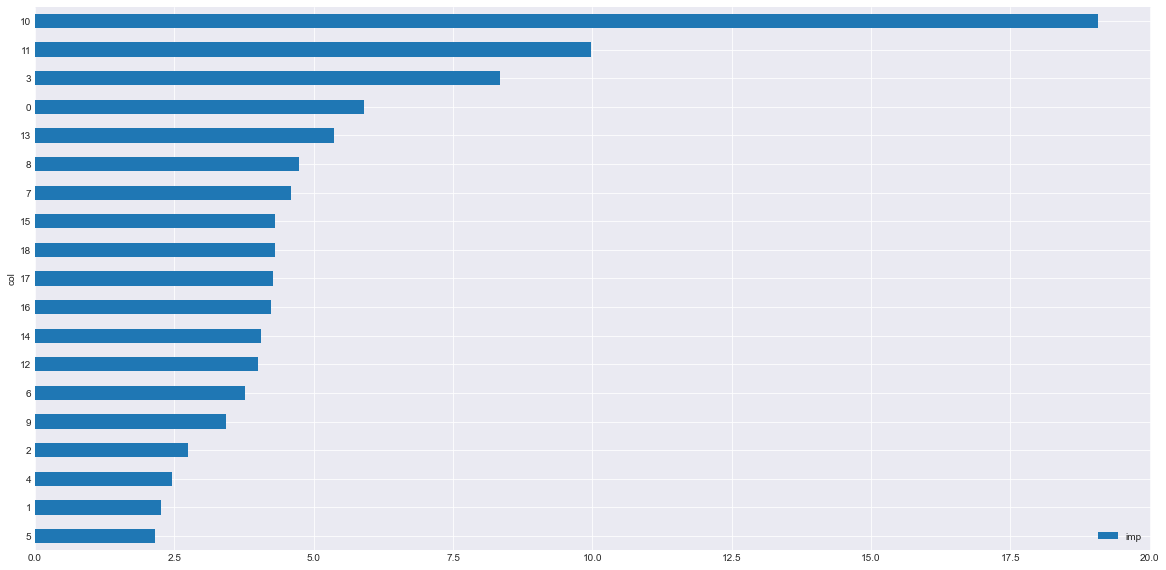

In [165]:
fea_imp = pd.DataFrame({'imp':clf.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-20:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))

In [166]:
final = {'Entry_id':df_test['Entry_id'], 'e_signed':preds}

final_sub = pd.DataFrame(final)
final_sub.head()

,Entry_id,e_signed
0,3560428,0.024753
1,6934997,0.073003
2,5682812,0.030291
3,6493191,0.065027
4,8990111,0.345532


In [167]:
final_sub.to_csv('datafest6.csv', index=False)